# Graph outputs from Dynamic Programming Problems

Graph results along a anumber of outcome/choices dimensions along state dimensions. 

Dependency: 
    - C:\Users\fan\R4Econ\dynamic\support\expandgrid.R

## Program

Graphing Program.

In [4]:
# Graphing Function, Multiple a-axis variables
ff_dyna_sup_grid_out_graph <- function(df, x.var,
                                       fill.var,
                                       out.var,
                                       subplot.var,
                                       it.fill.var.show.cnt = 3,
                                       it.subplot.var.show.cnt = 3,
                                       round = 3,
                                       ncol = 3,
                                       geom_type = 'line',
                                       st.caption = '',
                                       bl.lines.axis = FALSE,
                                       bl.lines.45 = FALSE,
                                       print=TRUE){
  # df <- df.aprime.max_c.fibs
  # x.var <- 'aprime'
  # fill.var <- 'fl_r_inf'
  # subplot.var <- 'fl_for_br_block'
  # out.var <- 'fl_coh_add'
  # ff_dyna_sup_grid_out_graph(df, x.var, fill.var, out.var, subplot.var,
  #                           it.fill.var.show.cnt = 3,
  #                           it.subplot.var.show.cnt = 3,
  #                           round = 3, ncol = 3, print=TRUE)

    fill.var.unique <- unique(df[[fill.var]])
    seq.fill.var <- unique(round(seq(1, length(fill.var.unique), length.out = it.fill.var.show.cnt)))

    if (!missing(subplot.var)){
        subplot.var.unique <- unique(df[[subplot.var]])
        seq.subplot.var <- unique(round(seq(1, length(subplot.var.unique), length.out = it.subplot.var.show.cnt)))

        df <- df %>%
            select(one_of(c(out.var, x.var, subplot.var, fill.var))) %>%
            arrange(!!sym(subplot.var), !!sym(fill.var), !!sym(x.var), !!sym(out.var)) %>%
            filter((!!sym(subplot.var)) %in% subplot.var.unique[seq.subplot.var])

    } else {
        df <- df %>%
            select(one_of(c(out.var, x.var, fill.var))) %>%
            arrange(!!sym(fill.var), !!sym(x.var), !!sym(out.var))
    }

    df <- df %>%
            filter((!!sym(fill.var)) %in% fill.var.unique[seq.fill.var]) %>%
            mutate(!!(fill.var) := as.factor(!!sym(fill.var)))


    plot <- df %>% ggplot(aes(x=!!sym(x.var),
                              y=!!sym(out.var),
                              color=!!sym(fill.var),
                              shape=!!sym(fill.var)))

    if (!missing(subplot.var)) {
        plot <- plot + facet_wrap(as.formula(paste0('~ ', subplot.var)), ncol = ncol)
    }

    if (geom_type == 'line') {
        plot <- plot  + geom_line(size = 1) + geom_point()
    }

    if (bl.lines.axis) {
      plot <- plot + geom_hline(yintercept = 0, size=1, color='black', linetype=2, alpha=0.5) +
                     geom_vline(xintercept = 0, size=1, color='black', linetype=2, alpha=0.5)
    }
    if (bl.lines.45) {
      plot <- plot + geom_abline(intercept = 0, slope = 1, size=1, color='black', linetype=1, alpha=0.5)
    }

   plot <- plot  + labs(title = paste0('outcome=',out.var,', x=', x.var, ', color=', fill.var),
                        caption = st.caption)

    plot <- plot + theme(axis.text.x = element_text(angle = 90, hjust = 1))

    if (print) {
      print(plot)
    }

    return(list(plot=plot))
}

## Load Data

In [5]:
# Library
library(tidyverse)
library(AER)
library(R.matlab)
source('C:/Users/fan/R4Econ/dynamic/support/expandgrid.R')

# Load Sample Data
setwd('C:/Users/fan/R4Econ/_data/')
matfile <- 'vf_az_p_ga_sa1.mat'
mat.out <- readMat(matfile)
# mat.out

## Test Program With only One Category

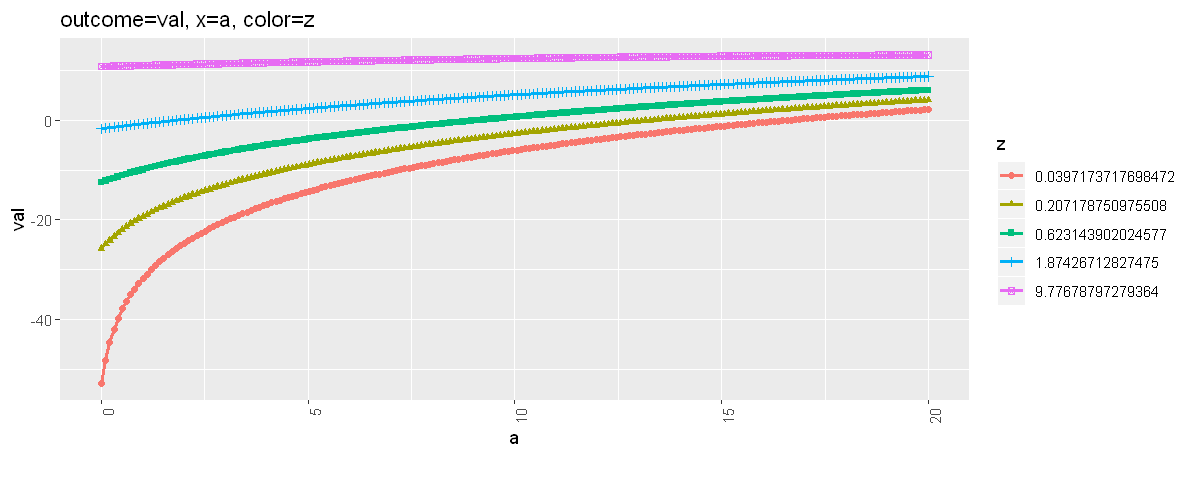

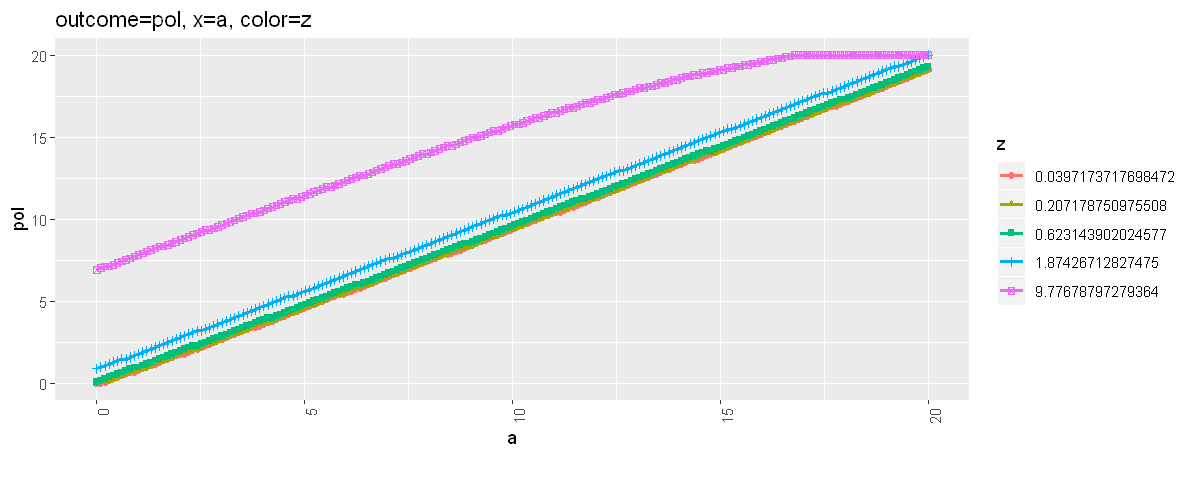

In [6]:
mt.pol <- mat.out$mt.pol
mt.val <- mat.out$mt.val
ar.a <- mat.out$ar.a
ar.z <- mat.out$ar.z

ar.st.vars <- c('a', 'z')
list.ar.fl <- list(ar.a, ar.z)
list.ts.valpolmat <- tibble(val=as.numeric(mt.val), pol=as.numeric(mt.pol))
df.solu <- ff_dyna_sup_expand_grids(ar.st.vars, list.ar.fl, list.ts.valpolmat)

options(repr.matrix.max.rows=500, repr.matrix.max.cols=20)
options(repr.plot.width = 10, repr.plot.height = 4)
plot <- ff_dyna_sup_grid_out_graph(df=df.solu, x.var='a', fill.var='z', out.var='val', it.fill.var.show.cnt=5)
options(repr.plot.width = 10, repr.plot.height = 4)
plot <- ff_dyna_sup_grid_out_graph(df=df.solu, x.var='a', fill.var='z', out.var='pol', it.fill.var.show.cnt=5)